# Caltech-256

Caltech-256 is a challenging set of 257 (including the last category of clutter) object categories containing a total of 30607 images. The original Caltech-101 [1] was collected by choosing a set of object categories, downloading examples from Google Images and then manually screening out all images that did not fit the category. Caltech-256 is collected in a similar manner with several improvements: a) the number of categories is more than doubled, b) the minimum number of images in any category is increased from 31 to 80, c) artifacts due to image rotation are avoided and d) a new and larger clutter category is introduced for testing background rejection. We suggest several testing paradigms to measure classification performance, then benchmark the dataset using two simple metrics as well as a state-of-the-art spatial pyramid matching [2] algorithm. Finally we use the clutter category to train an interest detector which rejects uninformative background regions. 



In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import cv2
import pickle
%matplotlib inline

In [2]:
path = 'G:/Caltech256/256_ObjectCategories/'

In [3]:
os.chdir(path)

In [4]:
folders = os.listdir()

In [5]:
folder_paths = []
all_images = []
all_classes = []

In [6]:
img_size = 128

In [7]:
from PIL import Image

def make_square(image, min_size=img_size, fill_color=(0, 0, 0, 0)):
    size = (min_size, min_size)
    image.thumbnail(size, Image.ANTIALIAS)
    background = Image.new('RGB', size, (255, 255, 255, 0))
    background.paste(
        image, (int((size[0] - image.size[0]) / 2), int((size[1] - image.size[1]) / 2))
    )

    new_img = np.array(background)
    new_img.flatten()
    return new_img

In [8]:
for folder in range(len(folders)):
    folder_paths = path+str(folders[folder])+str('/')
    
    os.chdir(folder_paths)
    image_in_folder = os.listdir()

    for image in range(len(image_in_folder)):
        img = Image.open(image_in_folder[image])
        img = make_square(img)
        
        all_images.append(img.flatten()/255)
        all_classes.append(folders[folder])


In [9]:
len(all_classes)

30607

In [10]:
len(all_images)

30607

In [11]:
all_images[2].shape

(49152,)

In [12]:
len(all_images)

30607

In [13]:
all_images[0].shape

(49152,)

In [14]:
all_images_df = np.asarray(all_images)

In [15]:
all_images_df.shape

(30607, 49152)

# Pickle 

In [17]:
import sys
sys.getsizeof(all_images_df)

12035162224

### Divide data such that it is less than 4GB

In [18]:
all_images_df1 = all_images_df[:10000,:]
all_images_df2 = all_images_df[10000:20000,:]
all_images_df3 = all_images_df[20000:,:]
print('all_images_df1:'+str(sys.getsizeof(all_images_df1)))
print('all_images_df2:'+str(sys.getsizeof(all_images_df2)))
print('all_images_df3:'+str(sys.getsizeof(all_images_df3)))

all_images_df1:112
all_images_df2:112
all_images_df3:112


### Save 

In [19]:
picklepath = 'G:/Caltech256/'
os.chdir(picklepath)

In [20]:
import pickle

pickle_out = open("pickle_all_images_df1.pickle","wb")
pickle.dump(all_images_df1, pickle_out)
pickle_out.close()

pickle_out = open("pickle_all_images_df2.pickle","wb")
pickle.dump(all_images_df2, pickle_out)
pickle_out.close()

pickle_out = open("pickle_all_images_df3.pickle","wb")
pickle.dump(all_images_df3, pickle_out)
pickle_out.close()

pickle_out = open("pickle_all_classes.pickle","wb")
pickle.dump(all_classes, pickle_out)
pickle_out.close()

In [21]:
all_images_df1.shape

(10000, 49152)

In [22]:
all_images_df2.shape

(10000, 49152)

In [23]:
all_images_df3.shape

(10607, 49152)

### Restore 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import cv2
import pickle
%matplotlib inline

In [2]:
import os
picklepath = 'G:/Caltech256/'
os.chdir(picklepath)

In [3]:
import pickle
pickle_in = open("pickle_all_images_df1.pickle","rb")
all_images_df1 = pickle.load(pickle_in)

pickle_in = open("pickle_all_images_df2.pickle","rb")
all_images_df2 = pickle.load(pickle_in)

pickle_in = open("pickle_all_images_df3.pickle","rb")
all_images_df3 = pickle.load(pickle_in)

pickle_in = open("pickle_all_classes.pickle","rb")
all_classes = pickle.load(pickle_in)


In [4]:
img_size = 128

In [5]:
all_images = np.concatenate((all_images_df1, all_images_df2,all_images_df3), axis=0)

In [6]:
del all_images_df1
del all_images_df2
del all_images_df3

In [7]:
all_images.shape

(30607, 49152)

### Sample Images

We resize the images such that the whole image will fit into a square because our Neural Network can only process square images. A lot of the images are not squares and each one has an almost unique aspect ratio. We will not zoom in into the image but rather zoom out so that we will not be losing any parts of the object and furthermore, retain the aspect ratio. See the sample below.

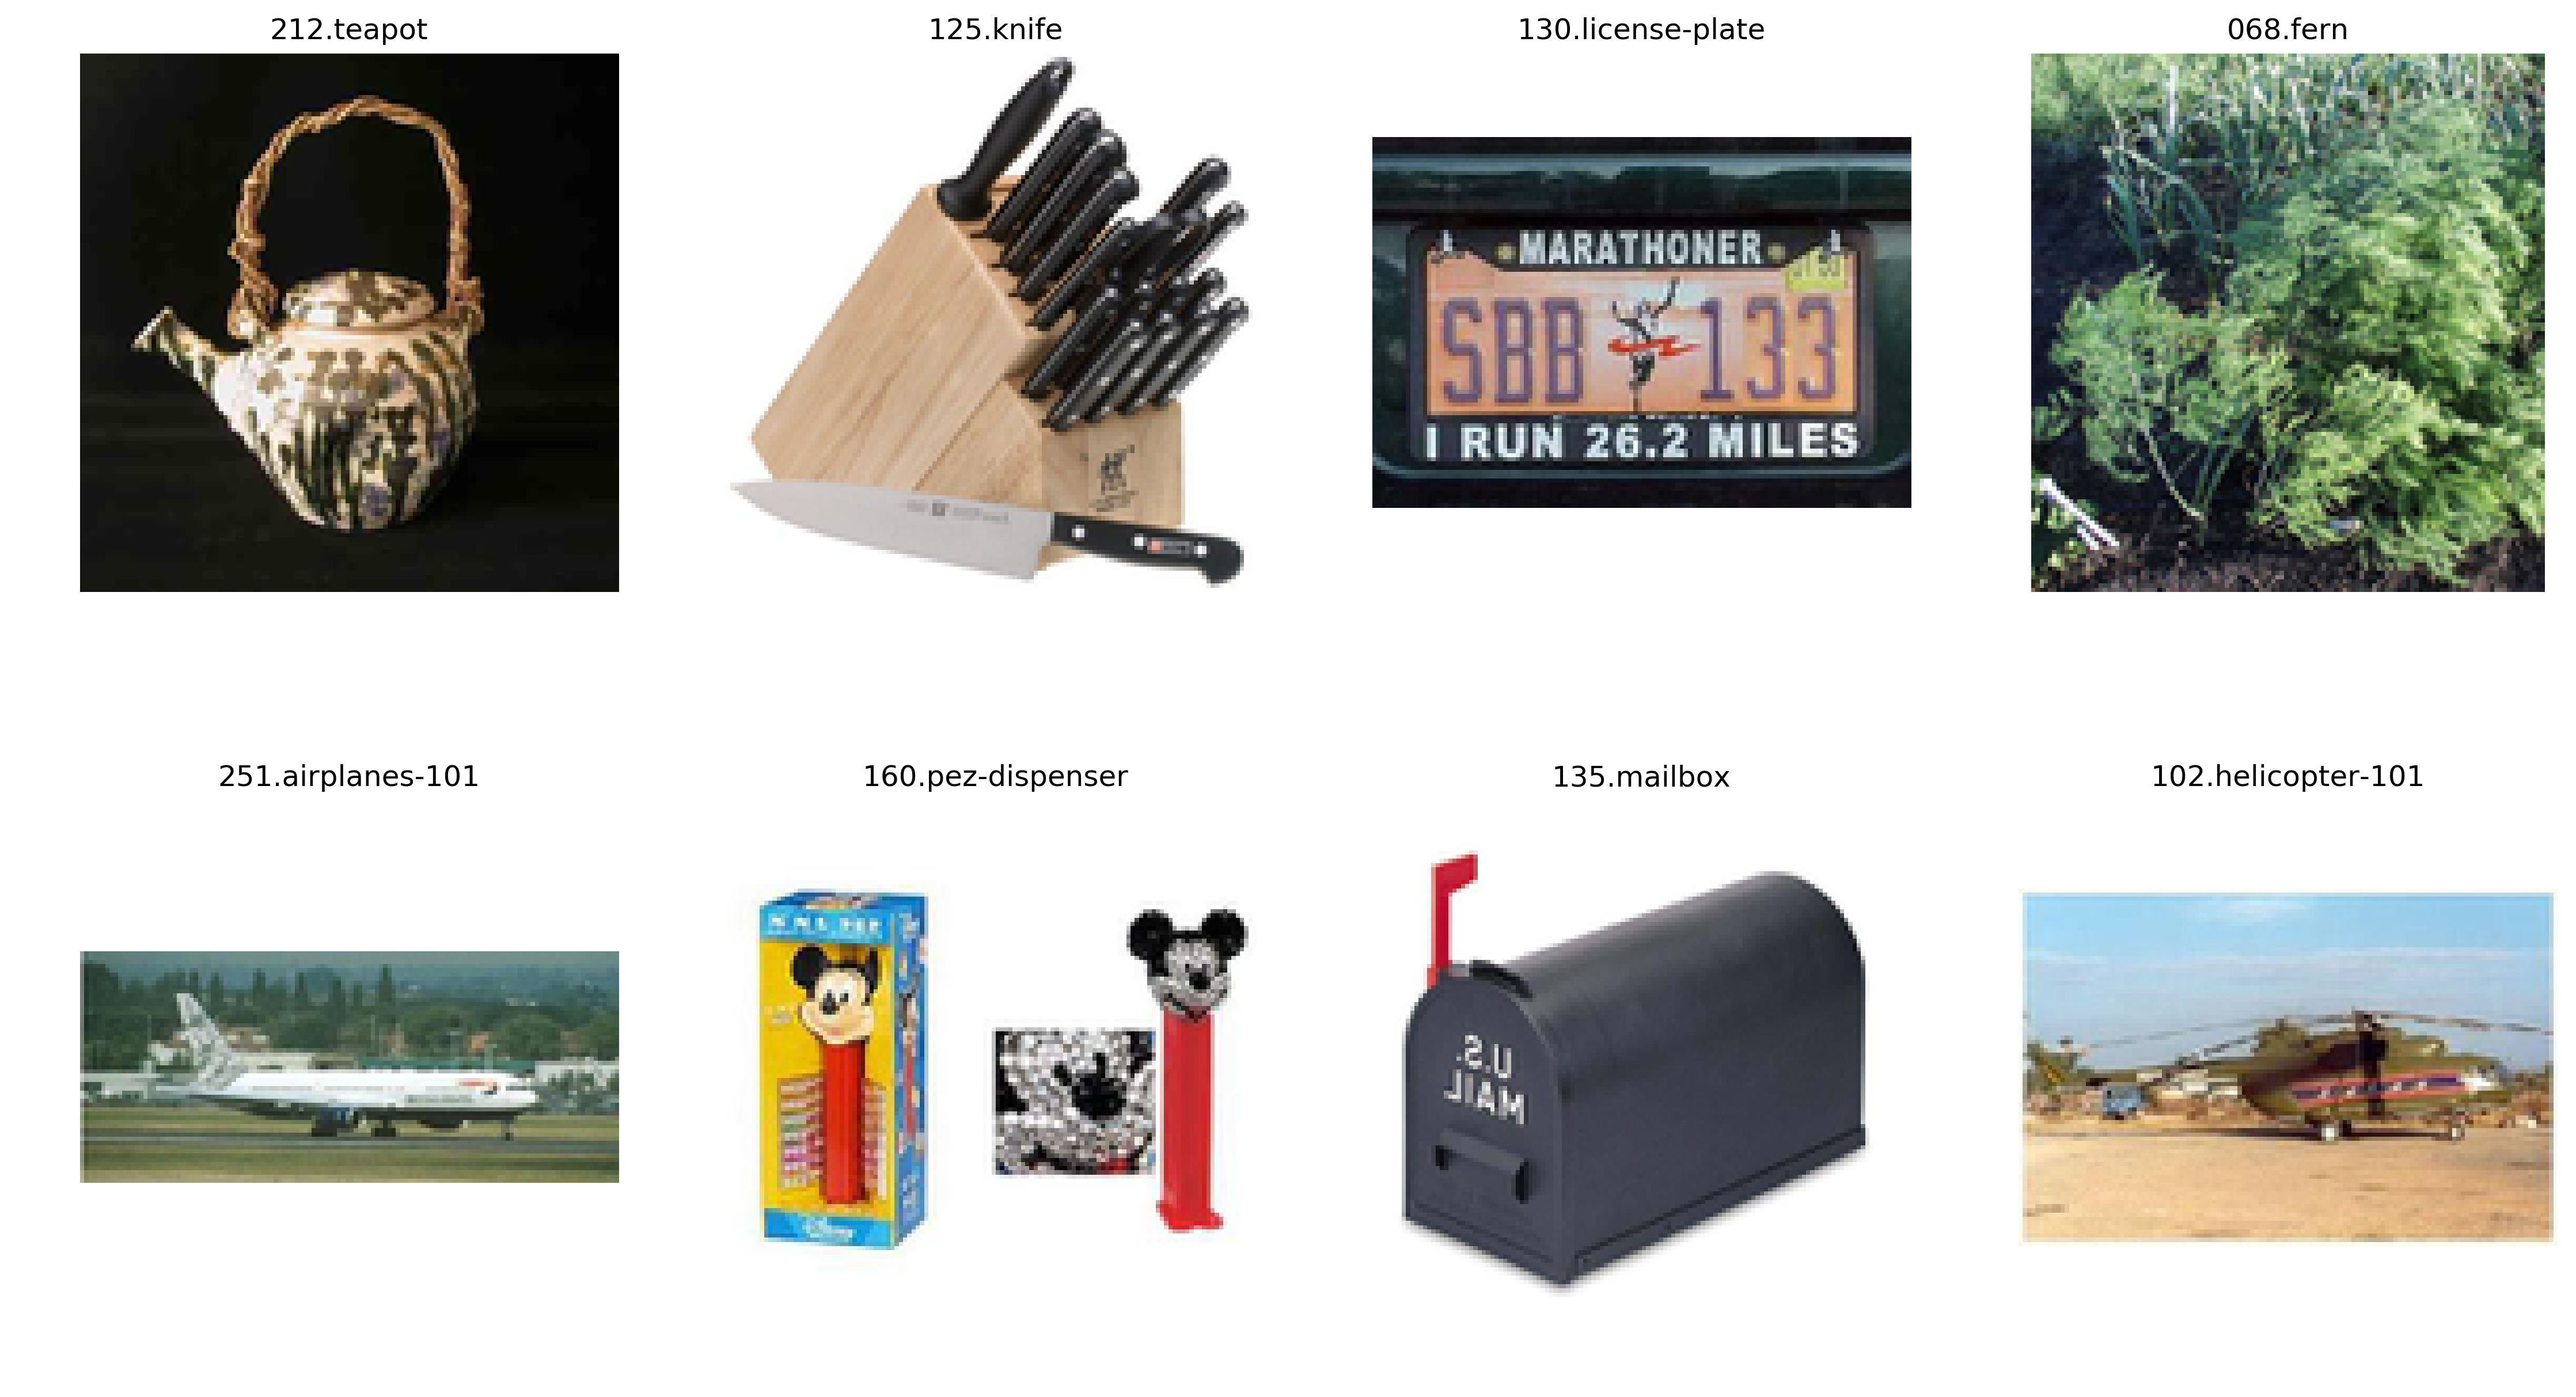

In [8]:
no_img = 8
images = np.random.choice(all_images.shape[0], no_img,replace=False)
f, axarr = plt.subplots(2,4)
f.set_size_inches(18.5, 10.5)
f.set_dpi(300)

for i in range(0,2):
    for j in range(0,4):
        image_index = images[(i*4)+(j+1)-1]
        axarr[i,j].imshow(all_images[image_index].reshape(img_size,img_size,3))
        axarr[i,j].set_title(all_classes[image_index])
        axarr[i,j].axis('off')
plt.savefig('Sample.png')

### List of Categories

In [9]:
set(all_classes)

{'001.ak47',
 '002.american-flag',
 '003.backpack',
 '004.baseball-bat',
 '005.baseball-glove',
 '006.basketball-hoop',
 '007.bat',
 '008.bathtub',
 '009.bear',
 '010.beer-mug',
 '011.billiards',
 '012.binoculars',
 '013.birdbath',
 '014.blimp',
 '015.bonsai-101',
 '016.boom-box',
 '017.bowling-ball',
 '018.bowling-pin',
 '019.boxing-glove',
 '020.brain-101',
 '021.breadmaker',
 '022.buddha-101',
 '023.bulldozer',
 '024.butterfly',
 '025.cactus',
 '026.cake',
 '027.calculator',
 '028.camel',
 '029.cannon',
 '030.canoe',
 '031.car-tire',
 '032.cartman',
 '033.cd',
 '034.centipede',
 '035.cereal-box',
 '036.chandelier-101',
 '037.chess-board',
 '038.chimp',
 '039.chopsticks',
 '040.cockroach',
 '041.coffee-mug',
 '042.coffin',
 '043.coin',
 '044.comet',
 '045.computer-keyboard',
 '046.computer-monitor',
 '047.computer-mouse',
 '048.conch',
 '049.cormorant',
 '050.covered-wagon',
 '051.cowboy-hat',
 '052.crab-101',
 '053.desk-globe',
 '054.diamond-ring',
 '055.dice',
 '056.dog',
 '057.dol

#### Imbalanced Plot

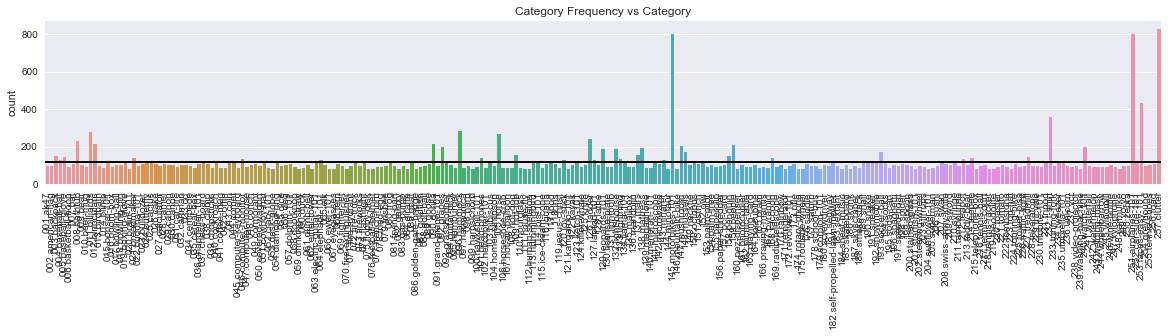

In [10]:
import seaborn as sns
plt.figure(figsize=(20,3))
ax = sns.countplot(all_classes)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
ax.set_title("Category Frequency vs Category")
plt.axhline(pd.Series(all_classes).value_counts().mean(), color='k', linewidth=2,)
plt.show()

As we can see the distribution of the dataset is highly imbalanced that can throw off our model. The black line indicates the average for the dataset. There are categories that are almost 8 times more than the other categories.  

### Cross Validation 

In [11]:
all_classes = pd.get_dummies(all_classes) 
all_images = np.array(all_images)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_images, all_classes, test_size=0.1)

# Fully Connected Neural Networks

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras.backend as K
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [14]:
dflist = []
learning_rates = [0.1,0.01,0.001]
activations = ['relu','tanh','sigmoid']
dropouts = [.75,.5,.25]

for lr in learning_rates:
    for activation in activations:
        for dropout in dropouts:
            K.clear_session()
            print('learning rate: '+ str(lr))
            print('Activation: '+ str(activation))
            print('Dropout: '+ str(dropout))
            
            
            model = Sequential()
            model.add(Dense(2048, kernel_initializer='he_uniform', input_dim= img_size*img_size*3))
            model.add(BatchNormalization())
            model.add(Activation(activation))
            model.add(Dropout(dropout))

            model.add(Dense(2048, kernel_initializer='he_uniform'))
            model.add(BatchNormalization())
            model.add(Activation(activation))
            model.add(Dropout(dropout))

            model.add(Dense(257, kernel_initializer='he_uniform', activation='softmax'))
            model.compile(Adam(lr=lr),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

            h = model.fit(X_train, y_train.values, batch_size=128, epochs=10, verbose=1,validation_split=0.1)
            dflist.append(pd.DataFrame(h.history, index=h.epoch))

learning rate: 0.1
Activation: relu
Dropout: 0.75
Train on 24791 samples, validate on 2755 samples
Epoch 1/10
24791/24791 [==============================] - 36s 1ms/step - loss: 15.6554 - acc: 0.0260 - val_loss: 15.6735 - val_acc: 0.0276
Epoch 2/10
24791/24791 [==============================] - 31s 1ms/step - loss: 15.6948 - acc: 0.0263 - val_loss: 15.6735 - val_acc: 0.0276
Epoch 3/10
24791/24791 [==============================] - 32s 1ms/step - loss: 15.6948 - acc: 0.0263 - val_loss: 15.6735 - val_acc: 0.0276
Epoch 4/10
24791/24791 [==============================] - 32s 1ms/step - loss: 15.6948 - acc: 0.0263 - val_loss: 15.6735 - val_acc: 0.0276
Epoch 5/10
24791/24791 [==============================] - 31s 1ms/step - loss: 15.6948 - acc: 0.0263 - val_loss: 15.6735 - val_acc: 0.0276
Epoch 6/10
24791/24791 [==============================] - 31s 1ms/step - loss: 15.6948 - acc: 0.0263 - val_loss: 15.6735 - val_acc: 0.0276
Epoch 7/10
24791/24791 [==============================] - 32s 1ms/s

24791/24791 [==============================] - 33s 1ms/step - loss: 15.6643 - acc: 0.0282 - val_loss: 15.6852 - val_acc: 0.0269
Epoch 6/10
24791/24791 [==============================] - 33s 1ms/step - loss: 15.6621 - acc: 0.0283 - val_loss: 15.7086 - val_acc: 0.0254
Epoch 7/10
24791/24791 [==============================] - 32s 1ms/step - loss: 15.6961 - acc: 0.0262 - val_loss: 15.7086 - val_acc: 0.0254
Epoch 8/10
24791/24791 [==============================] - 33s 1ms/step - loss: 15.6900 - acc: 0.0265 - val_loss: 15.7203 - val_acc: 0.0247
Epoch 9/10
24791/24791 [==============================] - 33s 1ms/step - loss: 15.6750 - acc: 0.0275 - val_loss: 15.6852 - val_acc: 0.0269
Epoch 10/10
24791/24791 [==============================] - 33s 1ms/step - loss: 15.6649 - acc: 0.0281 - val_loss: 15.6852 - val_acc: 0.0269
learning rate: 0.1
Activation: sigmoid
Dropout: 0.75
Train on 24791 samples, validate on 2755 samples
Epoch 1/10
24791/24791 [==============================] - 34s 1ms/step - l

24791/24791 [==============================] - 32s 1ms/step - loss: 4.0274 - acc: 0.1827 - val_loss: 4.8088 - val_acc: 0.1107
learning rate: 0.01
Activation: relu
Dropout: 0.25
Train on 24791 samples, validate on 2755 samples
Epoch 1/10
24791/24791 [==============================] - 34s 1ms/step - loss: 6.8785 - acc: 0.0805 - val_loss: 9.4380 - val_acc: 0.0243
Epoch 2/10
24791/24791 [==============================] - 33s 1ms/step - loss: 4.6404 - acc: 0.1228 - val_loss: 4.8284 - val_acc: 0.0849
Epoch 3/10
24791/24791 [==============================] - 32s 1ms/step - loss: 4.3715 - acc: 0.1479 - val_loss: 4.8144 - val_acc: 0.0868
Epoch 4/10
24791/24791 [==============================] - 33s 1ms/step - loss: 4.2066 - acc: 0.1664 - val_loss: 4.7283 - val_acc: 0.1082
Epoch 5/10
24791/24791 [==============================] - 33s 1ms/step - loss: 4.0514 - acc: 0.1806 - val_loss: 4.8251 - val_acc: 0.0966
Epoch 6/10
24791/24791 [==============================] - 33s 1ms/step - loss: 3.9227 - a

24791/24791 [==============================] - 33s 1ms/step - loss: 14.8189 - acc: 0.0393 - val_loss: 14.8806 - val_acc: 0.0334
Epoch 6/10
24791/24791 [==============================] - 33s 1ms/step - loss: 14.7994 - acc: 0.0389 - val_loss: 14.7679 - val_acc: 0.0319
Epoch 7/10
24791/24791 [==============================] - 33s 1ms/step - loss: 14.5312 - acc: 0.0404 - val_loss: 14.3690 - val_acc: 0.0439
Epoch 8/10
24791/24791 [==============================] - 33s 1ms/step - loss: 14.2904 - acc: 0.0435 - val_loss: 14.1122 - val_acc: 0.0421
Epoch 9/10
24791/24791 [==============================] - 32s 1ms/step - loss: 13.9874 - acc: 0.0465 - val_loss: 13.8506 - val_acc: 0.0454
Epoch 10/10
24791/24791 [==============================] - 33s 1ms/step - loss: 13.2000 - acc: 0.0472 - val_loss: 12.4586 - val_acc: 0.0472
learning rate: 0.01
Activation: sigmoid
Dropout: 0.25
Train on 24791 samples, validate on 2755 samples
Epoch 1/10
24791/24791 [==============================] - 35s 1ms/step - 

learning rate: 0.001
Activation: tanh
Dropout: 0.5
Train on 24791 samples, validate on 2755 samples
Epoch 1/10
24791/24791 [==============================] - 33s 1ms/step - loss: 5.5872 - acc: 0.0731 - val_loss: 5.0521 - val_acc: 0.0897
Epoch 2/10
24791/24791 [==============================] - 32s 1ms/step - loss: 5.1989 - acc: 0.1017 - val_loss: 4.9582 - val_acc: 0.1216
Epoch 3/10
24791/24791 [==============================] - 32s 1ms/step - loss: 4.9606 - acc: 0.1201 - val_loss: 4.9982 - val_acc: 0.0947
Epoch 4/10
24791/24791 [==============================] - 32s 1ms/step - loss: 4.7912 - acc: 0.1372 - val_loss: 4.8225 - val_acc: 0.1172
Epoch 5/10
24791/24791 [==============================] - 32s 1ms/step - loss: 4.6195 - acc: 0.1501 - val_loss: 4.7556 - val_acc: 0.1191
Epoch 6/10
24791/24791 [==============================] - 32s 1ms/step - loss: 4.5025 - acc: 0.1612 - val_loss: 4.8190 - val_acc: 0.1122
Epoch 7/10
24791/24791 [==============================] - 32s 1ms/step - loss:

## Results 

In [15]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates,activations,dropouts, metrics_reported],
                                 names=['learning_rate', 'activations','dropouts','metric'])
historydf.columns = idx
historydf = historydf.T

In [46]:
historydf.to_csv('historydf.csv')

In [26]:
historydf

0          1          2  \
learning_rate activations dropouts metric                                      
0.100         relu        0.75     acc        0.025977   0.026260   0.026260   
                                   loss      15.655389  15.694841  15.694841   
                                   val_acc    0.027586   0.027586   0.027586   
                                   val_loss  15.673458  15.673458  15.673458   
                          0.50     acc        0.044613   0.046549   0.047074   
                                   loss      15.343083  15.367169  15.358870   
                                   val_acc    0.033394   0.044283   0.042105   
                                   val_loss  15.579850  15.399481  15.436330   
                          0.25     acc        0.032552   0.032229   0.031786   
                                   loss      15.541169  15.598169  15.605770   
                                   val_acc    0.033757   0.031216   0.032305   
                                   val_loss  15.574000  15.614953  15.597402   
              tanh        0.75     acc        0.042636   0.046549   0.031181   
                                   loss      15.343776  15.367254  15.614730   
                                   val_acc    0.041742   0.045009   0.027949   
                                   val_loss  15.438877  15.389261  15.667607   
                          0.50     acc        0.040095   0.042435   0.043605   
                                   loss      15.383883  15.432780  15.414009   
                                   val_acc    0.040653   0.041016   0.042105   
                                   val_loss  15.459783  15.456990  15.439439   
                          0.25     acc        0.025170   0.027550   0.027954   
                                   loss      15.630373  15.672961  15.666963   
                                   val_acc    0.026134   0.027223   0.026860   
                                   val_loss  15.696860  15.679309  15.685159   
              sigmoid     0.75     acc        0.026179   0.027954   0.014360   
                                   loss      15.642423  15.667019  15.885009   
                                   val_acc    0.025408   0.027586   0.005808   
                                   val_loss  15.708561  15.673458  16.024487   
                          0.50     acc        0.026824   0.027107   0.027107   
                                   loss      15.631378  15.681188  15.681188   
...                                                ...        ...        ...   
0.001         relu        0.50     val_acc    0.091833   0.108530   0.113249   
                                   val_loss   5.223526   4.768183   4.771180   
                          0.25     acc        0.096124   0.136864   0.171151   
                                   loss       5.215133   4.627026   4.276141   
                                   val_acc    0.085662   0.097641   0.070417   
                                   val_loss   5.281691   4.913810   5.191776   
              tanh        0.75     acc        0.048364   0.071478   0.084103   
                                   loss       6.269705   5.837033   5.596762   
                                   val_acc    0.072958   0.092196   0.111434   
                                   val_loss   5.148072   5.043399   4.833334   
                          0.50     acc        0.073091   0.101730   0.120124   
                                   loss       5.587193   5.198858   4.960587   
                                   val_acc    0.089655   0.121597   0.094737   
                                   val_loss   5.052087   4.958202   4.998243   
                          0.25     acc        0.083014   0.121697   0.149006   
                                   loss       5.378775   4.902071   4.652533   
                                   val_acc    0.075136   0.096915   0.105989   
                                   val_loss   5.21206

As we can see this method is not effective. The best the model did is an accuracy of 14% in the test set using 0.001 learning rate, tanh activation and .75 dropout. The model is not learning enough, we can do much better with the use of Convolutional Neural Networks.

### Reset Kernel

We have to reset the kernel a few times for this exercise because our RAM and our VRAM gets full quickly when running a model

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import cv2
import pickle
%matplotlib inline
img_size =  128
picklepath = 'G:/Caltech256/'
os.chdir(picklepath)
pickle_in = open("pickle_all_images_df1.pickle","rb")
all_images_df1 = pickle.load(pickle_in)

pickle_in = open("pickle_all_images_df2.pickle","rb")
all_images_df2 = pickle.load(pickle_in)

pickle_in = open("pickle_all_images_df3.pickle","rb")
all_images_df3 = pickle.load(pickle_in)

pickle_in = open("pickle_all_classes.pickle","rb")
all_classes = pickle.load(pickle_in)
all_images = np.concatenate((all_images_df1, all_images_df2,all_images_df3), axis=0)
del all_images_df1
del all_images_df2
del all_images_df3

from sklearn.model_selection import train_test_split

all_images = pd.DataFrame(all_images)
X_test = all_images.groupby(all_classes).apply(lambda s: s.sample(4))
test_index = X_test.index.levels[1].values

X_test = X_test.reset_index(0).reset_index(drop=True)
X_test = X_test.drop('level_0',axis = 1)
X_train = all_images.drop(test_index)
all_classes = pd.Series(all_classes)
y_train = all_classes.drop(test_index)
y_test = all_classes.iloc[test_index]

y_train = pd.get_dummies(y_train) 
y_test = pd.get_dummies(y_test) 

X_train = X_train.as_matrix()
X_test = X_test.as_matrix()

del all_images
X_train = X_train.reshape(-1,img_size,img_size,3)
X_test = X_test.reshape(-1,img_size,img_size,3)
path = 'G:/Caltech256/256_ObjectCategories/'

### Reshape data into Image Format

In [20]:
X_train = X_train.reshape(-1,img_size,img_size,3)

In [21]:
X_test = X_test.reshape(-1,img_size,img_size,3)

In [22]:
X_train.shape

(27546, 128, 128, 3)

In [23]:
X_test.shape

(3061, 128, 128, 3)

### Data Generator (Data Augmentation)

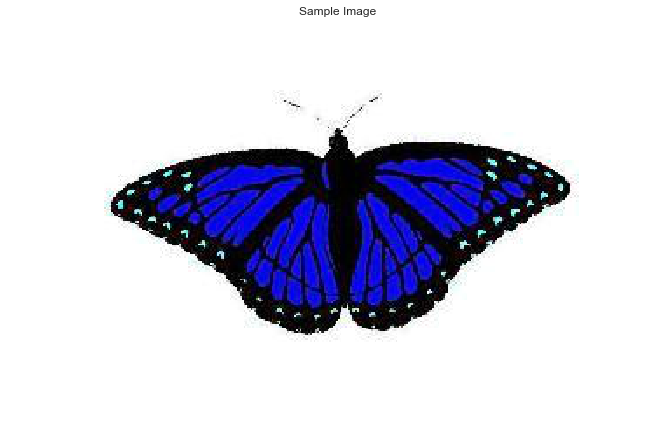

In [233]:
import cv2 
sample_image = 'sample1.jpg'
image = cv2.imread(sample_image)
plt.figure(figsize=(11,7))
plt.axis('off')
plt.axis('equal')
plt.imshow(image)
plt.title("Sample Image")

In [234]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [235]:
generator = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img(sample_image) 
x = img_to_array(img)  
x = x.reshape((1,) + x.shape)  

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='butterfly', save_format='jpeg'):
    i += 1
    if i > 10:
        break  

In [236]:
folder = "G:/Caltech256/preview/"

In [237]:
butterfly_filename = os.listdir(folder)

Below are some samples of our image augmentation. It is a good way of expanding the dataset which is advantageous for our model. Neural Networks are known to strive and only improve as we add more data. It can improve the accuracy by a significant rate but only to an extent since were not actually adding new data.


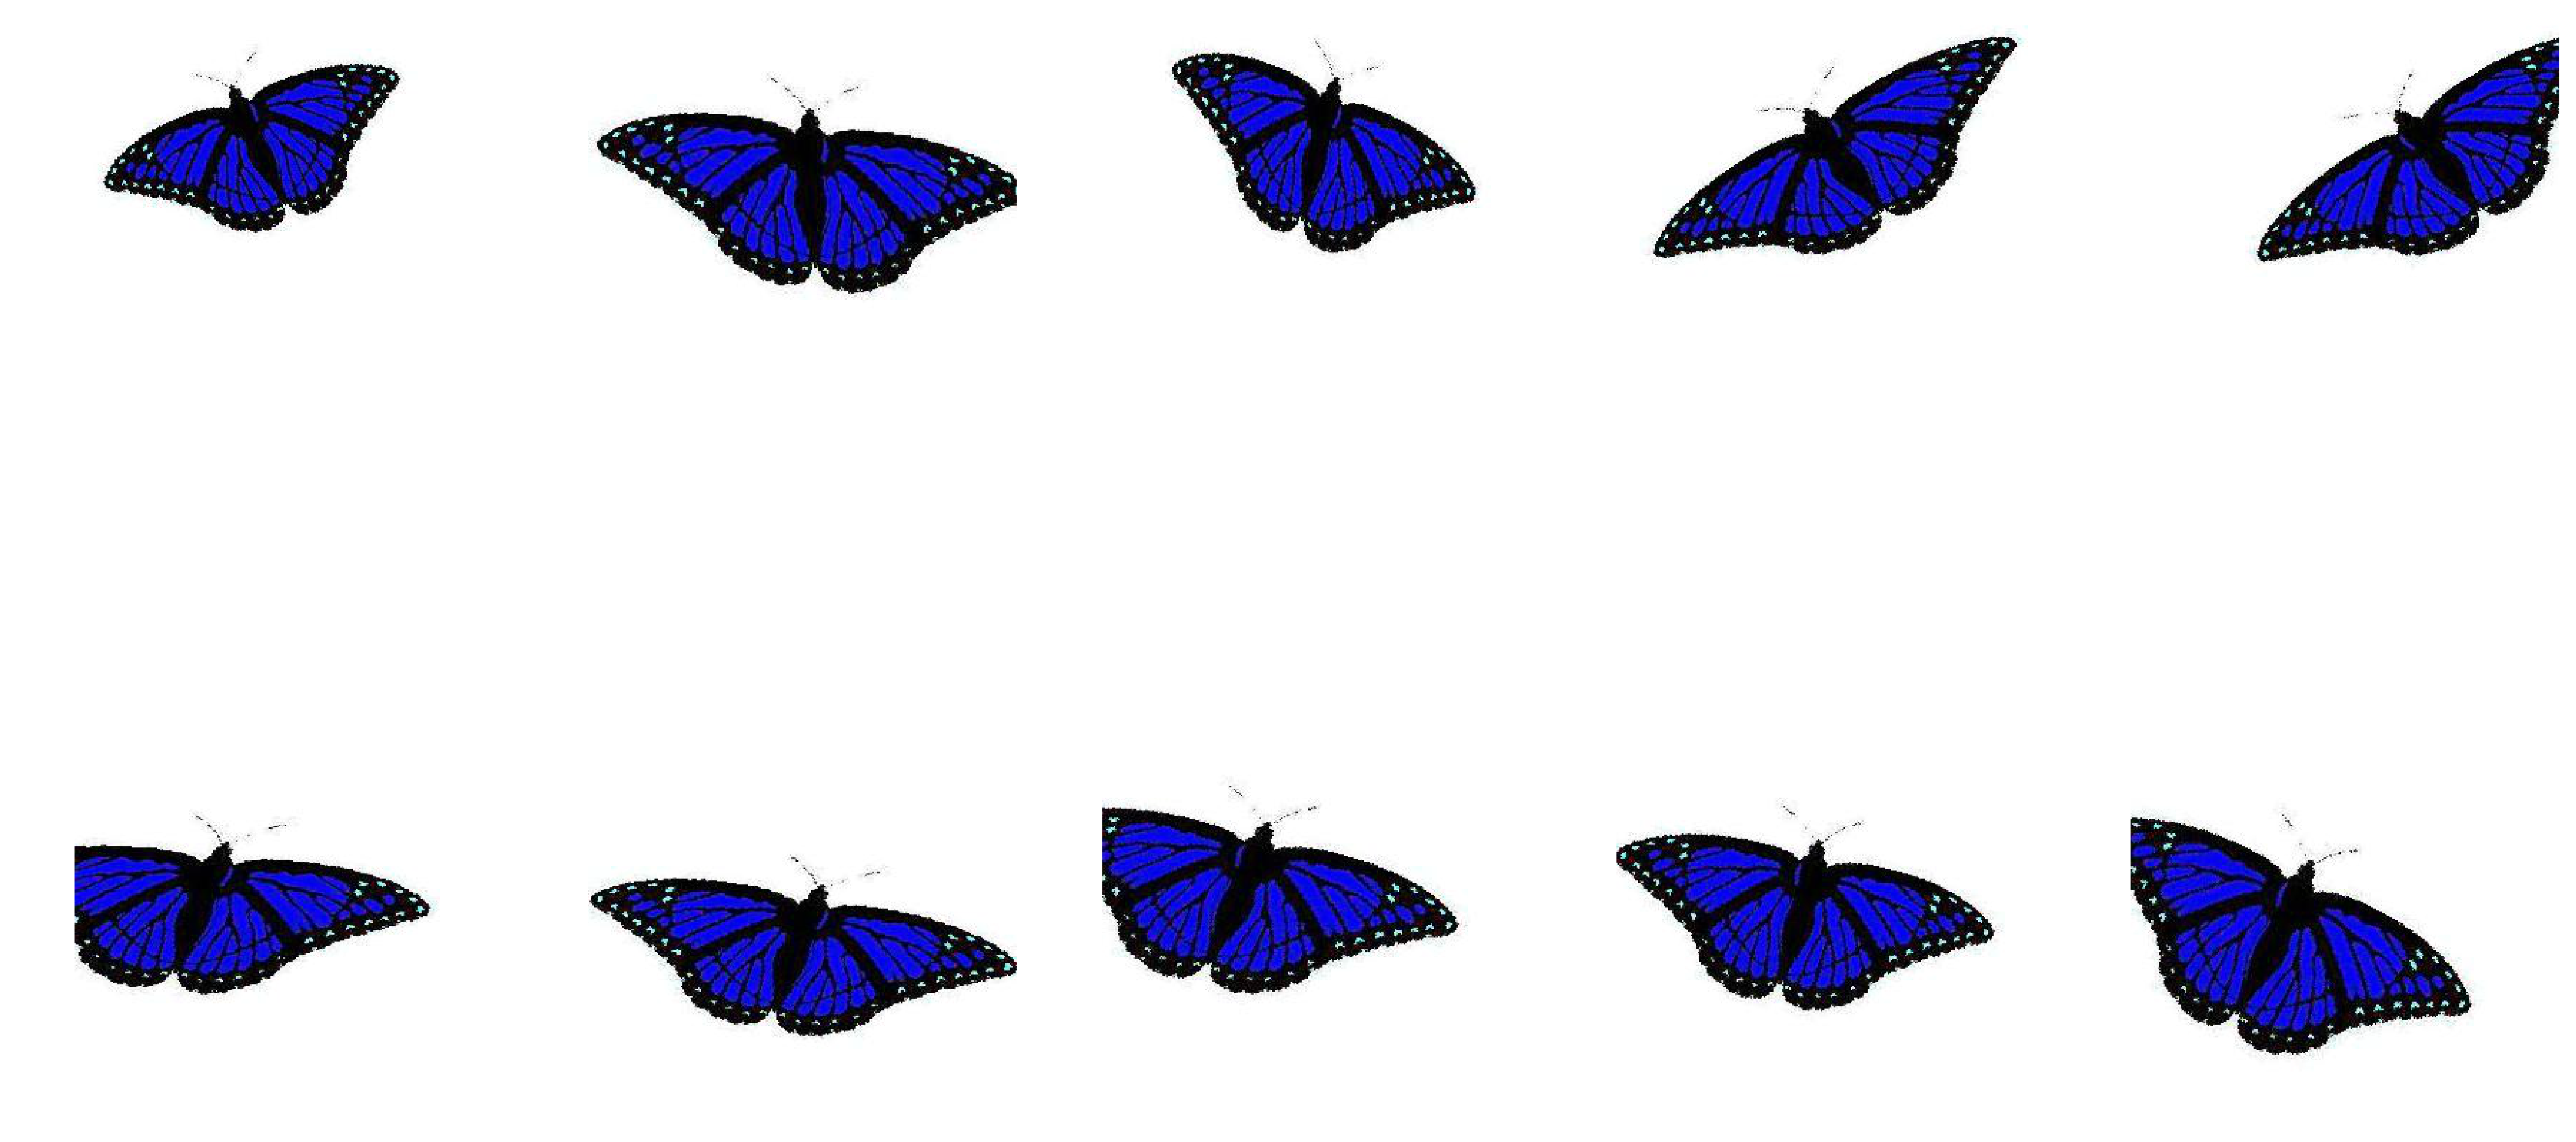

In [242]:
no_img = 10
f, axarr = plt.subplots(2,5)
f.set_size_inches(18.5, 10.5)
f.set_dpi(300)

for i in range(0,2):
    for j in range(0,5):
        image_index = (i*5)+(j+1)-1
        axarr[i,j].imshow(cv2.imread(str(folder) + butterfly_filename[image_index]))
        axarr[i,j].axis('off')


In [ ]:
generator.flow(X_train)

# Convolutional Neural Networks

CNNs are made specifically for images and its performance shows just that. Despite having less parameters, it still outperforms a fully connected neural network. Furthermore, because it has less parameters it is much faster. 

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras.backend as K
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, MaxPool2D, AvgPool2D,Flatten

## Training models from scratch 

### VGG  architecture

The VGG is one of the winners of imagenet that was a convolutional neural network. It is best known for using 3x3 filters. Its architecture is a series of  Convolutional Layer and Relu Layer (two or three) then are followed by a pooling layer whose padding is valid. For its Fully Connected layer it has 3 consecutive relu layers. It is unique in this way because most State-of-the-Art CNN models use a single softmax layer. Due to number of Convolutional Layers it typically has a large number of parameters. Its architecture is very simple and is most commonly taught in tutorials. I consider this the most basic convolutional neural network. https://arxiv.org/pdf/1409.1556.pdf  

In [18]:
layer = 3
filterz = 32
lr = .001
epochs = 80
batch_size = 32
decay = lr/epochs
adam = Adam(lr=lr,decay=decay)

model = Sequential()
model.add(Conv2D(filters = (filterz), kernel_size= (3,3), input_shape = (img_size,img_size,3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
print('filter: '+ str(filterz))

for i in range(layer):
    filterz1 = filterz * (2**(i+1))
    model.add(Conv2D(filters = filterz1, kernel_size= (3,3), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    print('filter: '+ str(filterz * (2**(i+1))))

print('\n')
model.add(Flatten())

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu')) 

model.add(Dense(257,activation='softmax'))
model.compile(adam, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])



filter: 32
filter: 64
filter: 128
filter: 256




In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization_26 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
batch_normalization_27 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 64, 64, 64)        0         
__________

In [20]:
def show_model(model,model_name,figsize):
    from keras.utils.vis_utils import plot_model
    from cv2 import imread 
    model_name = str(model_name)+'_model_plot.png'
    plot_model(model, to_file=model_name, show_shapes=True, show_layer_names=True)

    image = cv2.imread(model_name)
    plt.figure(figsize=figsize)
    plt.axis('off')
    plt.axis('equal')
    plt.imshow(image)

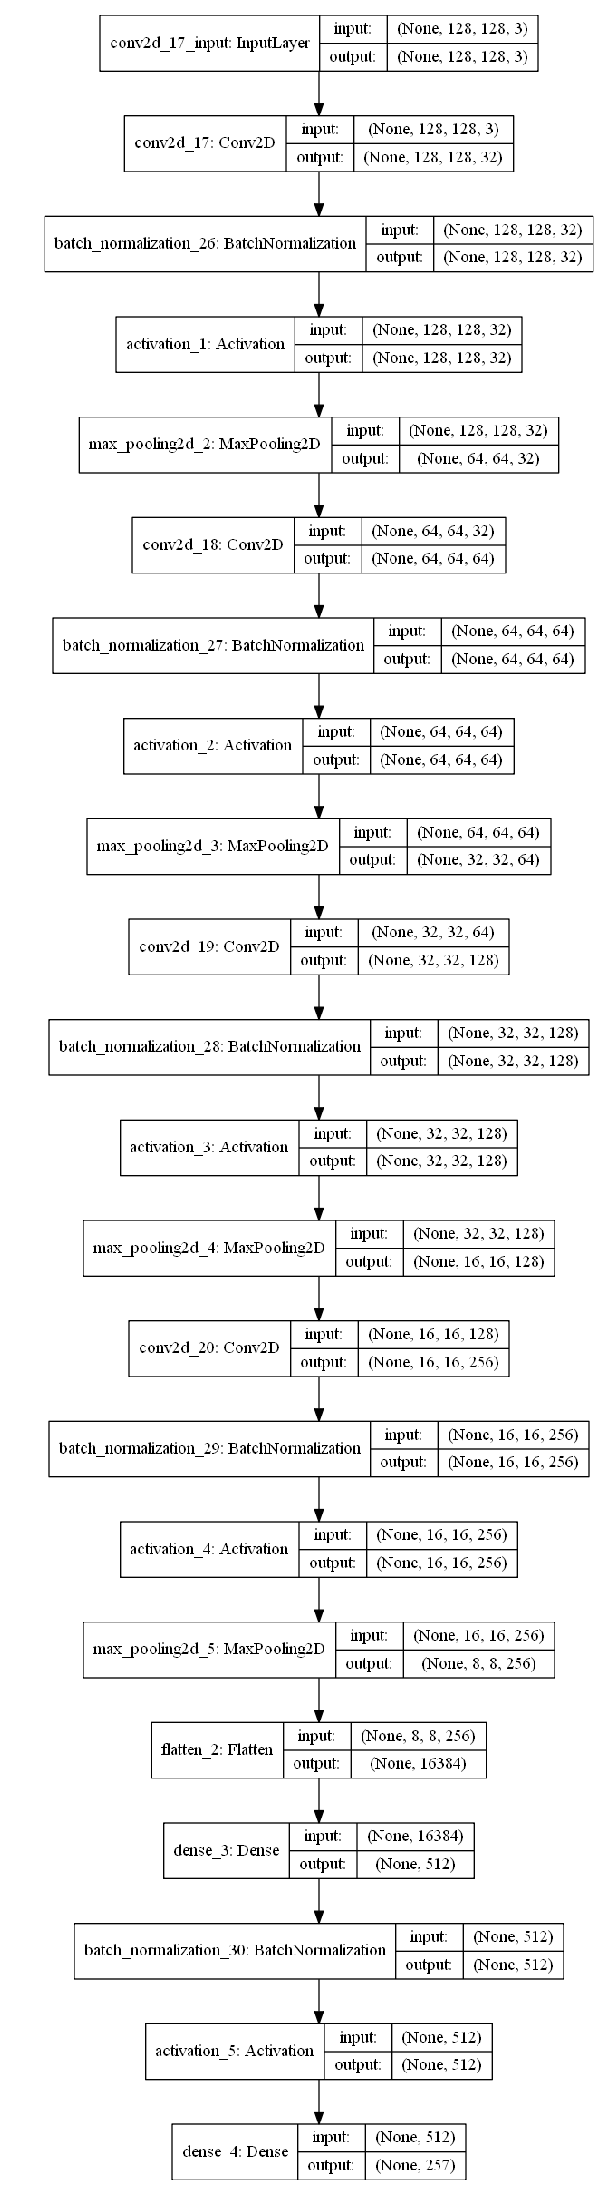

In [21]:
show_model(model,'VGG',(10,40))

In [22]:
model.fit_generator(generator.flow(X_train, y_train.values, batch_size=batch_size),
                    steps_per_epoch=len(X_train) / batch_size, 
                    epochs=80,
                    verbose=1,
                    validation_data=(X_test, y_test.values))

Epoch 1/80
925/924 [==============================] - 95s 102ms/step - loss: 4.7653 - acc: 0.1150 - val_loss: 4.9567 - val_acc: 0.0681
Epoch 2/80
925/924 [==============================] - 91s 98ms/step - loss: 4.1527 - acc: 0.1764 - val_loss: 5.1146 - val_acc: 0.0730
Epoch 3/80
925/924 [==============================] - 92s 99ms/step - loss: 3.8341 - acc: 0.2152 - val_loss: 4.2813 - val_acc: 0.1556
Epoch 4/80
925/924 [==============================] - 92s 99ms/step - loss: 3.6039 - acc: 0.2457 - val_loss: 3.8407 - val_acc: 0.2198
Epoch 5/80
925/924 [==============================] - 90s 97ms/step - loss: 3.4281 - acc: 0.2754 - val_loss: 3.8034 - val_acc: 0.2286
Epoch 6/80
925/924 [==============================] - 89s 96ms/step - loss: 3.2671 - acc: 0.2953 - val_loss: 3.6015 - val_acc: 0.2588
Epoch 7/80
925/924 [==============================] - 88s 95ms/step - loss: 3.1173 - acc: 0.3214 - val_loss: 3.5022 - val_acc: 0.2675
Epoch 8/80
925/924 [==============================] - 88s 95m

### Model Accuracy: 44.75%

# Inception 

Another winner of imagenet is the Inception. This is probably one of the more interesting and creative architectures that I have seen. The main problem that the inception is addressing the order of pooling layers and convolutional layers and furthermore, the filter sizes of the convolutional layers. This basically combines all of them into a single convolutional block as seen in the image below. In addition, they also figured out how to reduce computational time by adding 1x1 covolutions. This is clever because the model is not only learning the wich parameters to use but has the option to use the appropriate filter size and when to use pooling.
https://arxiv.org/abs/1409.4842

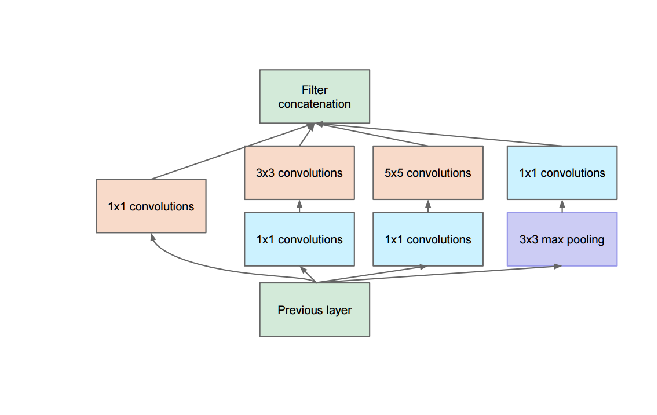

In [38]:
import cv2 
image = cv2.imread('inception_block.png')
plt.figure(figsize=(11,7))
plt.axis('off')
plt.axis('equal')
plt.imshow(image)

In [11]:
import time
time.sleep(100)

In [39]:
from keras.layers import Input
input_img = Input(shape = (img_size, img_size, 3))

In [40]:
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D,BatchNormalization
from keras.layers import concatenate
from keras.layers import Flatten, Dense
from keras.models import Model

def inception_layer(prev_layer,filters):
    tower_1 = Conv2D(filters, (1,1), padding='same', activation='relu')(prev_layer)
    tower_1 = Conv2D(filters, (3,3), padding='same', activation='relu')(tower_1)

    tower_2 = Conv2D(int(filters/4), (1,1), padding='same', activation='relu')(prev_layer)
    tower_2 = Conv2D(int(filters/2), (5,5), padding='same', activation='relu')(tower_2)

    tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(prev_layer)
    tower_3 = Conv2D(filters, (1,1), padding='same', activation='relu')(tower_3)

    tower_4 = Conv2D(filters, (1,1), padding='same', activation='relu')(prev_layer)

    tower_5 = concatenate([tower_1, tower_2, tower_3,tower_4], axis = 3)
    tower_5 = BatchNormalization()(tower_5)
    return tower_5

In [41]:
def create_model():
    tower_0 = Conv2D(32, (3,3), padding='same', activation='relu')(input_img)
    tower_0 = BatchNormalization()(tower_0)
    tower_0 = MaxPooling2D((2, 2))(tower_0)

    layer_1 = inception_layer(tower_0,32)
    layer_2 = inception_layer(layer_1,32)
    
    layer_3 = MaxPooling2D((2, 2))(layer_2)
    
    layer_4 = inception_layer(layer_3,64)
    layer_5 = inception_layer(layer_4,64)
    
    extra_1 = inception_layer(layer_5,128)
    extra_2 = inception_layer(extra_1,256)    
    extra_3 = inception_layer(extra_2,512)     
    
    layer_6 = MaxPooling2D((2, 2))(layer_5)
    
    layer_7 = inception_layer(layer_6,1024)
    layer_8 = inception_layer(layer_7,1024)
 
    tower_7 = MaxPooling2D((2, 2))(layer_8)
    tower_8 = AveragePooling2D((2, 2))(tower_7)

    output = Flatten()(tower_8)
    output  = Dense(512, activation='relu')(output)
    out = Dense(257, activation='softmax')(output)

    model = Model(inputs = input_img, outputs = out)
    return model

In [43]:
from keras.optimizers import SGD
from keras.optimizers import Adam
lr = .001 
epochs = 80
batch_size = 16
decay = lr/epochs
adam = Adam(lr=lr,decay=decay)
sgd = SGD(lr=lr, momentum=0.9, decay=decay, nesterov=False)
model = create_model()

In [46]:
show_model(model,'Inception',(92,200))

In [47]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_357 (Conv2D)             (None, 128, 128, 32) 896         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_312 (BatchN (None, 128, 128, 32) 128         conv2d_357[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_22 (MaxPooling2D) (None, 64, 64, 32)   0           batch_normalization_312[0][0]    
__________________________________________________________________________________________________
conv2d_358

In [48]:
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit_generator(generator.flow(X_train, y_train.values, batch_size=batch_size),
                    steps_per_epoch=len(X_train) / batch_size, epochs=epochs
                    ,verbose=1,validation_data=(X_test, y_test.values))

Epoch 1/80
1849/1848 [==============================] - 753s 407ms/step - loss: 5.1800 - acc: 0.0762 - val_loss: 5.6079 - val_acc: 0.0185
Epoch 2/80
1849/1848 [==============================] - 749s 405ms/step - loss: 4.7732 - acc: 0.1089 - val_loss: 5.3396 - val_acc: 0.0272
Epoch 3/80
1849/1848 [==============================] - 750s 406ms/step - loss: 4.4813 - acc: 0.1358 - val_loss: 4.7632 - val_acc: 0.0827
Epoch 4/80
1849/1848 [==============================] - 756s 409ms/step - loss: 4.2695 - acc: 0.1585 - val_loss: 4.8351 - val_acc: 0.0875
Epoch 5/80
1849/1848 [==============================] - 758s 410ms/step - loss: 4.1357 - acc: 0.1747 - val_loss: 4.3645 - val_acc: 0.1284
Epoch 6/80
1849/1848 [==============================] - 757s 409ms/step - loss: 4.0057 - acc: 0.1897 - val_loss: 4.2992 - val_acc: 0.1304
Epoch 7/80
1849/1848 [==============================] - 762s 412ms/step - loss: 3.8832 - acc: 0.2072 - val_loss: 4.1155 - val_acc: 0.1625
Epoch 8/80
1849/1848 [============

1849/1848 [==============================] - 754s 408ms/step - loss: 0.8968 - acc: 0.7560 - val_loss: 3.6287 - val_acc: 0.4484
Epoch 61/80
1849/1848 [==============================] - 754s 408ms/step - loss: 0.8529 - acc: 0.7662 - val_loss: 3.4527 - val_acc: 0.4475
Epoch 62/80
1849/1848 [==============================] - 754s 408ms/step - loss: 0.8318 - acc: 0.7721 - val_loss: 3.6196 - val_acc: 0.4387
Epoch 63/80
1849/1848 [==============================] - 755s 408ms/step - loss: 0.8032 - acc: 0.7794 - val_loss: 3.6847 - val_acc: 0.4056
Epoch 64/80
1849/1848 [==============================] - 753s 407ms/step - loss: 0.7784 - acc: 0.7855 - val_loss: 4.0421 - val_acc: 0.4018
Epoch 65/80
1849/1848 [==============================] - 753s 407ms/step - loss: 0.7547 - acc: 0.7910 - val_loss: 3.5305 - val_acc: 0.4504
Epoch 66/80
1849/1848 [==============================] - 753s 407ms/step - loss: 0.7186 - acc: 0.7995 - val_loss: 3.6884 - val_acc: 0.4290
Epoch 67/80
1849/1848 [================

In [49]:
from keras.models import load_model
model.save('inception_model.h5') 
del model  
model = load_model('inception_model.h5')

In [50]:
model.evaluate(x = X_test, y = y_test.values)

1028/1028 [==============================] - 11s 10ms/step


[4.4786045783224733, 0.40272373540856032]

### Model Accuracy: 48%

# Resnet 

When Restnet won the imagenet competition it blew everyone away by the size of its lead to its next competitor. Normally when you train a neural network, once it gets deeper the update to the gradient reduces. Resnet combated this by skipping blocks as seen in the below image. This allowed the resnet to have hundreds of layers and still produce a good result. On a typical Neural Network as you add more layers your accuracy decreases.   
https://arxiv.org/abs/1512.03385

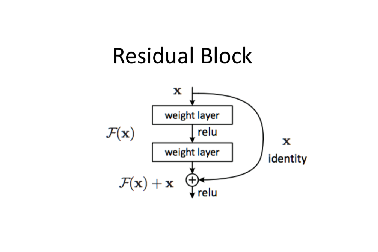

In [5]:
image = cv2.imread('residual_block.png')
plt.axis('off')
plt.axis('equal')
plt.imshow(image)

In [51]:
import time
time.sleep(100)

In [6]:
from keras.layers import Input
input_img = Input(shape = (img_size, img_size, 3))

In [7]:
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D,BatchNormalization
from keras.layers import concatenate, Merge, add
from keras.layers import Flatten, Dense
from keras.models import Model

def conv_block(filters, prev, strides):
    prev = Conv2D(filters, (3,3), padding='same', activation='relu',strides=strides)(prev) 
    prev = BatchNormalization()(prev)
    prev = Conv2D(filters, (3,3), padding='same', activation='relu')(prev) 
    prev = BatchNormalization()(prev)
    return prev

def skip_block(filters_in, filters_out, prev):
    if filters_in != filters_out:
        prev = Conv2D(filters_out,(1,1), strides = (2,2))(prev) 
    prev = BatchNormalization()(prev)
    return prev 


def residual_block(filters_in, filters_out, prev_layer, strides = (1,1)):
    skip = skip_block(filters_in, filters_out, prev_layer)
    conv = conv_block(filters_out, prev_layer, strides)
    resid = add([skip, conv]) 
    resid = BatchNormalization()(resid)
    return resid

In [8]:
filter1 = 128
tower_0 = Conv2D(filter1, (7,7), padding='same', activation='relu')(input_img)
tower_0 = BatchNormalization()(tower_0)
tower_0 = MaxPooling2D((2, 2))(tower_0)

filter2 = 256
tower_1 = residual_block(filter1, filter2, tower_0, (2,2))
tower_1 = residual_block(filter2, filter2, tower_1)

filter3 = 512
tower_2 = residual_block(filter2, filter3, tower_1, (2,2))
tower_2 = residual_block(filter3, filter3, tower_2)

filter4 = 1024
tower_3 = residual_block(filter3, filter4, tower_2, (2,2))
tower_3 = residual_block(filter4, filter4, tower_3)

ave_pool = AveragePooling2D()(tower_3)

output = Flatten()(ave_pool)
output  = Dense(512, activation='relu')(output)
out = Dense(257, activation='softmax')(output)

model = Model(inputs = input_img, outputs = out)


In [9]:
from keras.optimizers import SGD
from keras.optimizers import Adam
epochs = 80
lrate = 0.0001
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=lrate, decay=decay)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [12]:
show_model(model,'Resnet',(92,200))

In [13]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 128 18944       input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 128 512         conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 64, 64, 128)  0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_3 (

In [14]:
batch_size = 8

In [15]:
model.fit_generator(generator.flow(X_train, y_train.values, batch_size=batch_size),
                    steps_per_epoch=len(X_train) / batch_size, epochs=epochs
                    ,verbose=1,validation_data=(X_test, y_test.values))

Epoch 1/80
3698/3697 [==============================] - 869s 235ms/step - loss: 5.3158 - acc: 0.0660 - val_loss: 5.7061 - val_acc: 0.0263
Epoch 2/80
3698/3697 [==============================] - 867s 234ms/step - loss: 4.9550 - acc: 0.0953 - val_loss: 5.5169 - val_acc: 0.0418
Epoch 3/80
3698/3697 [==============================] - 866s 234ms/step - loss: 4.6739 - acc: 0.1178 - val_loss: 5.6901 - val_acc: 0.0409
Epoch 4/80
3698/3697 [==============================] - 868s 235ms/step - loss: 4.4455 - acc: 0.1375 - val_loss: 5.1584 - val_acc: 0.0545
Epoch 5/80
3698/3697 [==============================] - 868s 235ms/step - loss: 4.2494 - acc: 0.1603 - val_loss: 4.5963 - val_acc: 0.1138
Epoch 6/80
3698/3697 [==============================] - 869s 235ms/step - loss: 4.0806 - acc: 0.1814 - val_loss: 4.3087 - val_acc: 0.1654
Epoch 7/80
3698/3697 [==============================] - 868s 235ms/step - loss: 3.9331 - acc: 0.2020 - val_loss: 4.2590 - val_acc: 0.1644
Epoch 8/80
3698/3697 [============

3698/3697 [==============================] - 864s 234ms/step - loss: 0.5844 - acc: 0.8342 - val_loss: 5.0733 - val_acc: 0.3648
Epoch 61/80
3698/3697 [==============================] - 867s 234ms/step - loss: 0.5764 - acc: 0.8357 - val_loss: 4.5047 - val_acc: 0.4280
Epoch 62/80
3698/3697 [==============================] - 865s 234ms/step - loss: 0.5722 - acc: 0.8360 - val_loss: 4.1303 - val_acc: 0.4776
Epoch 63/80
3698/3697 [==============================] - 865s 234ms/step - loss: 0.5299 - acc: 0.8472 - val_loss: 4.2049 - val_acc: 0.4708
Epoch 64/80
3698/3697 [==============================] - 865s 234ms/step - loss: 0.5283 - acc: 0.8495 - val_loss: 4.4779 - val_acc: 0.4582
Epoch 65/80
3698/3697 [==============================] - 866s 234ms/step - loss: 0.5175 - acc: 0.8520 - val_loss: 4.5971 - val_acc: 0.4523
Epoch 66/80
3698/3697 [==============================] - 865s 234ms/step - loss: 0.4891 - acc: 0.8601 - val_loss: 4.5787 - val_acc: 0.4504
Epoch 67/80
3698/3697 [================

In [16]:
from keras.models import load_model
model.save('resnet_model.h5') 
del model  
model = load_model('resnet_model.h5')

In [17]:
model.evaluate(x = X_test, y = y_test.values)

1028/1028 [==============================] - 7s 7ms/step


[4.902225955451045, 0.46206225680933855]

### Model Accuracy: 47%

None of the models that were built were able to make it pass 50% accuracy. Considering that this a 257 way classification, a random guess would only give us an accuracy of 0.39%. In a way is okay but still not good enough.

# Transfer Learning 

You can only do so much tweaking with the hyperparameters, sometimes the data is just not enough. One option is to utilize transfer learning. Transfer Learning is when you use another model that was preferably trained on a similar dataset and retrain in on your dataset. Normally, you would replace the model's fully connected layer with your own and in addition you can add even more fully connected layers. The training does not stop there, you can also enable layers that are close to the fully connected layers to be trainable. This is a very good technique to use to get a high accuracy. In the succeeding models I will be using state-of-the-art models that are available in keras. There are a decent amount of models available to be used. 

### Reset Kernel

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import cv2
import pickle
%matplotlib inline
img_size =  128
picklepath = 'G:/Caltech256/'
os.chdir(picklepath)
pickle_in = open("pickle_all_images_df1.pickle","rb")
all_images_df1 = pickle.load(pickle_in)

pickle_in = open("pickle_all_images_df2.pickle","rb")
all_images_df2 = pickle.load(pickle_in)

pickle_in = open("pickle_all_images_df3.pickle","rb")
all_images_df3 = pickle.load(pickle_in)

pickle_in = open("pickle_all_classes.pickle","rb")
all_classes = pickle.load(pickle_in)
all_images = np.concatenate((all_images_df1, all_images_df2,all_images_df3), axis=0)
del all_images_df1
del all_images_df2
del all_images_df3

from sklearn.model_selection import train_test_split

all_images = pd.DataFrame(all_images)
X_test = all_images.groupby(all_classes).apply(lambda s: s.sample(4))
test_index = X_test.index.levels[1].values

X_test = X_test.reset_index(0).reset_index(drop=True)
X_test = X_test.drop('level_0',axis = 1)
X_train = all_images.drop(test_index)
all_classes = pd.Series(all_classes)
y_train = all_classes.drop(test_index)
y_test = all_classes.iloc[test_index]

y_train = pd.get_dummies(y_train) 
y_test = pd.get_dummies(y_test) 

X_train = X_train.as_matrix()
X_test = X_test.as_matrix()

del all_images
X_train = X_train.reshape(-1,img_size,img_size,3)
X_test = X_test.reshape(-1,img_size,img_size,3)
path = 'G:/Caltech256/256_ObjectCategories/'

In [13]:
from keras.preprocessing.image import ImageDataGenerator

In [14]:
generator = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

generator.flow(X_train)

# VGG

In [5]:
import time
time.sleep(100)

In [6]:
batch_size = 128

In [7]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.optimizers import Adam
from keras.applications.vgg19 import VGG19

base_model = VGG19(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(257, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

adam = Adam(lr=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit_generator(generator.flow(X_train, y_train.values, batch_size=batch_size),len(X_train) / batch_size, epochs=10,verbose=1,validation_data=(X_test, y_test.values))


Epoch 1/10
232/231 [==============================] - 93s 402ms/step - loss: 4.5065 - acc: 0.1252 - val_loss: 3.8607 - val_acc: 0.1595
Epoch 2/10
232/231 [==============================] - 89s 386ms/step - loss: 3.5517 - acc: 0.2342 - val_loss: 3.4271 - val_acc: 0.2179
Epoch 3/10
232/231 [==============================] - 89s 384ms/step - loss: 3.2382 - acc: 0.2837 - val_loss: 3.0943 - val_acc: 0.2967
Epoch 4/10
232/231 [==============================] - 82s 354ms/step - loss: 3.0777 - acc: 0.3106 - val_loss: 3.0620 - val_acc: 0.3132
Epoch 5/10
232/231 [==============================] - 83s 360ms/step - loss: 2.9444 - acc: 0.3343 - val_loss: 2.9455 - val_acc: 0.3346
Epoch 6/10
232/231 [==============================] - 83s 357ms/step - loss: 2.8536 - acc: 0.3506 - val_loss: 2.8452 - val_acc: 0.3473
Epoch 7/10
232/231 [==============================] - 85s 366ms/step - loss: 2.7730 - acc: 0.3621 - val_loss: 2.7851 - val_acc: 0.3619
Epoch 8/10
232/231 [==============================] - 8

In [8]:
for layer in model.layers:
    layer.trainable = True

time.sleep(100)

from keras.optimizers import SGD
adam = Adam(lr=0.00001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit_generator(generator.flow(X_train, y_train.values, batch_size=batch_size),len(X_train) / batch_size, epochs=10,verbose=1,validation_data=(X_test, y_test.values))

Epoch 1/10
232/231 [==============================] - 259s 1s/step - loss: 2.1276 - acc: 0.4835 - val_loss: 2.1982 - val_acc: 0.4971
Epoch 2/10
232/231 [==============================] - 256s 1s/step - loss: 1.8993 - acc: 0.5314 - val_loss: 2.0814 - val_acc: 0.5000
Epoch 3/10
232/231 [==============================] - 255s 1s/step - loss: 1.7941 - acc: 0.5541 - val_loss: 2.0514 - val_acc: 0.5117
Epoch 4/10
232/231 [==============================] - 345s 1s/step - loss: 1.7082 - acc: 0.5748 - val_loss: 1.9832 - val_acc: 0.5224
Epoch 5/10
232/231 [==============================] - 412s 2s/step - loss: 1.6382 - acc: 0.5907 - val_loss: 1.9241 - val_acc: 0.5467
Epoch 6/10
232/231 [==============================] - 258s 1s/step - loss: 1.5828 - acc: 0.6013 - val_loss: 1.9023 - val_acc: 0.5506
Epoch 7/10
232/231 [==============================] - 258s 1s/step - loss: 1.5223 - acc: 0.6170 - val_loss: 1.8597 - val_acc: 0.5525
Epoch 8/10
232/231 [==============================] - 258s 1s/step - 

In [11]:
from keras.models import load_model
model.save('vgg_model.h5') 
del model  
model = load_model('vgg_model.h5')

In [12]:
model.evaluate(x = X_test, y = y_test.values)

1028/1028 [==============================] - 3s 3ms/step


[1.7906704876673361, 0.57490272373540852]

Model Accuracy: 57%

The transfer learning of the VGG model made an improvement of more than 10% compared to the VGG model the was built from scratch

# Inception

In [13]:
time.sleep(100)

In [14]:
batch_size = 16

In [15]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.optimizers import Adam

base_model = InceptionV3(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(257, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

adam = Adam(lr=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit_generator(generator.flow(X_train, y_train.values, batch_size=batch_size),len(X_train) / batch_size, epochs=10,verbose=1,validation_data=(X_test, y_test.values))

for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

for layer in model.layers[:249]:
    layer.trainable = False
for layer in model.layers[249:]:
    layer.trainable = True

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit_generator(generator.flow(X_train, y_train.values, batch_size=batch_size),len(X_train) / batch_size, epochs=10,verbose=1,validation_data=(X_test, y_test.values))

Epoch 1/10
1849/1848 [==============================] - 120s 65ms/step - loss: 4.9184 - acc: 0.1118 - val_loss: 4.2616 - val_acc: 0.1868
Epoch 2/10
1849/1848 [==============================] - 113s 61ms/step - loss: 4.0484 - acc: 0.2182 - val_loss: 3.7186 - val_acc: 0.2782
Epoch 3/10
1849/1848 [==============================] - 116s 63ms/step - loss: 3.7122 - acc: 0.2597 - val_loss: 3.5049 - val_acc: 0.3123
Epoch 4/10
1849/1848 [==============================] - 114s 62ms/step - loss: 3.5210 - acc: 0.2893 - val_loss: 3.3274 - val_acc: 0.3356
Epoch 5/10
1849/1848 [==============================] - 115s 62ms/step - loss: 3.4270 - acc: 0.2979 - val_loss: 3.1808 - val_acc: 0.3531
Epoch 6/10
1849/1848 [==============================] - 115s 62ms/step - loss: 3.3192 - acc: 0.3175 - val_loss: 3.2082 - val_acc: 0.3599
Epoch 7/10
1849/1848 [==============================] - 113s 61ms/step - loss: 3.2660 - acc: 0.3191 - val_loss: 3.1258 - val_acc: 0.3492
Epoch 8/10
1849/1848 [===================

Epoch 8/10
1849/1848 [==============================] - 162s 87ms/step - loss: 1.9096 - acc: 0.5459 - val_loss: 2.0545 - val_acc: 0.5545
Epoch 9/10
1849/1848 [==============================] - 162s 87ms/step - loss: 1.8733 - acc: 0.5507 - val_loss: 2.0581 - val_acc: 0.5700
Epoch 10/10
1849/1848 [==============================] - 162s 87ms/step - loss: 1.8048 - acc: 0.5653 - val_loss: 2.0298 - val_acc: 0.5700


In [16]:
for layer in model.layers[:200]:
    layer.trainable = False
for layer in model.layers[200:]:
    layer.trainable = True

time.sleep(100)

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit_generator(generator.flow(X_train, y_train.values, batch_size=batch_size),len(X_train) / batch_size, epochs=20,verbose=1,validation_data=(X_test, y_test.values))

Epoch 1/20
1849/1848 [==============================] - 199s 108ms/step - loss: 2.0609 - acc: 0.5143 - val_loss: 2.0445 - val_acc: 0.5496
Epoch 2/20
1849/1848 [==============================] - 192s 104ms/step - loss: 1.7230 - acc: 0.5801 - val_loss: 2.0046 - val_acc: 0.5710
Epoch 3/20
1849/1848 [==============================] - 193s 104ms/step - loss: 1.6193 - acc: 0.6001 - val_loss: 1.9723 - val_acc: 0.5856
Epoch 4/20
1849/1848 [==============================] - 193s 104ms/step - loss: 1.5394 - acc: 0.6176 - val_loss: 1.9001 - val_acc: 0.5953
Epoch 5/20
1849/1848 [==============================] - 193s 104ms/step - loss: 1.4665 - acc: 0.6310 - val_loss: 1.8551 - val_acc: 0.6060
Epoch 6/20
1849/1848 [==============================] - 193s 104ms/step - loss: 1.4170 - acc: 0.6454 - val_loss: 1.8237 - val_acc: 0.6235
Epoch 7/20
1849/1848 [==============================] - 193s 105ms/step - loss: 1.3774 - acc: 0.6490 - val_loss: 1.8515 - val_acc: 0.6158
Epoch 8/20
1849/1848 [============

In [17]:
from keras.models import load_model
model.save('inception_model.h5') 
del model  
model = load_model('inception_model.h5')

In [18]:
model.evaluate(x = X_test, y = y_test.values)

1028/1028 [==============================] - 4s 4ms/step


[1.9541673719419115, 0.63813229571984431]

Model Accuracy:63%

### Inception Resnet

In [19]:
batch_size = 64

In [20]:
time.sleep(100)

In [21]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2
base_model = InceptionResNetV2(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(257, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

adam = Adam(lr=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit_generator(generator.flow(X_train, y_train.values, batch_size=batch_size),len(X_train) / batch_size, epochs=20,verbose=1,validation_data=(X_test, y_test.values))


Epoch 1/20
463/462 [==============================] - 107s 231ms/step - loss: 4.9141 - acc: 0.1453 - val_loss: 4.0190 - val_acc: 0.2665
Epoch 2/20
463/462 [==============================] - 102s 220ms/step - loss: 3.9330 - acc: 0.2881 - val_loss: 3.3587 - val_acc: 0.3531
Epoch 3/20
463/462 [==============================] - 102s 220ms/step - loss: 3.5136 - acc: 0.3346 - val_loss: 3.0624 - val_acc: 0.3911
Epoch 4/20
463/462 [==============================] - 102s 220ms/step - loss: 3.3008 - acc: 0.3568 - val_loss: 2.9308 - val_acc: 0.4018
Epoch 5/20
463/462 [==============================] - 102s 220ms/step - loss: 3.1637 - acc: 0.3783 - val_loss: 2.8005 - val_acc: 0.4222
Epoch 6/20
463/462 [==============================] - 102s 220ms/step - loss: 3.0639 - acc: 0.3886 - val_loss: 2.7226 - val_acc: 0.4329
Epoch 7/20
463/462 [==============================] - 102s 221ms/step - loss: 2.9681 - acc: 0.3976 - val_loss: 2.6915 - val_acc: 0.4368
Epoch 8/20
463/462 [============================

In [22]:

for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

for layer in model.layers[:249]:
    layer.trainable = False
for layer in model.layers[249:]:
    layer.trainable = True

time.sleep(100)

from keras.optimizers import SGD
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit_generator(generator.flow(X_train, y_train.values, batch_size=batch_size),len(X_train) / batch_size, epochs=30,verbose=1,validation_data=(X_test, y_test.values))

0 input_3
1 conv2d_95
2 batch_normalization_95
3 activation_95
4 conv2d_96
5 batch_normalization_96
6 activation_96
7 conv2d_97
8 batch_normalization_97
9 activation_97
10 max_pooling2d_5
11 conv2d_98
12 batch_normalization_98
13 activation_98
14 conv2d_99
15 batch_normalization_99
16 activation_99
17 max_pooling2d_6
18 conv2d_103
19 batch_normalization_103
20 activation_103
21 conv2d_101
22 conv2d_104
23 batch_normalization_101
24 batch_normalization_104
25 activation_101
26 activation_104
27 average_pooling2d_10
28 conv2d_100
29 conv2d_102
30 conv2d_105
31 conv2d_106
32 batch_normalization_100
33 batch_normalization_102
34 batch_normalization_105
35 batch_normalization_106
36 activation_100
37 activation_102
38 activation_105
39 activation_106
40 mixed_5b
41 conv2d_110
42 batch_normalization_110
43 activation_110
44 conv2d_108
45 conv2d_111
46 batch_normalization_108
47 batch_normalization_111
48 activation_108
49 activation_111
50 conv2d_107
51 conv2d_109
52 conv2d_112
53 batch_norm

Epoch 1/30
463/462 [==============================] - 249s 538ms/step - loss: 1.8827 - acc: 0.5618 - val_loss: 1.4449 - val_acc: 0.6586
Epoch 2/30
463/462 [==============================] - 225s 486ms/step - loss: 1.1246 - acc: 0.7152 - val_loss: 1.2406 - val_acc: 0.7043
Epoch 3/30
463/462 [==============================] - 225s 486ms/step - loss: 0.8536 - acc: 0.7740 - val_loss: 1.2254 - val_acc: 0.7179
Epoch 4/30
463/462 [==============================] - 225s 487ms/step - loss: 0.6785 - acc: 0.8189 - val_loss: 1.1927 - val_acc: 0.7335
Epoch 5/30
463/462 [==============================] - 225s 486ms/step - loss: 0.5486 - acc: 0.8500 - val_loss: 1.2124 - val_acc: 0.7247
Epoch 6/30
463/462 [==============================] - 225s 486ms/step - loss: 0.4598 - acc: 0.8727 - val_loss: 1.2334 - val_acc: 0.7247
Epoch 7/30
463/462 [==============================] - 225s 486ms/step - loss: 0.4006 - acc: 0.8846 - val_loss: 1.3307 - val_acc: 0.7033
Epoch 8/30
463/462 [============================

In [ ]:
from keras.models import load_model
model.save('inceptionresnet_model.h5') 
del model  
model = load_model('inceptionresnet_model.h5')

In [29]:
model.evaluate(x = X_test, y = y_test.values)

1028/1028 [==============================] - 5s 5ms/step


[1.655475185697777, 0.71498054474708173]

Model Accuracy: 71%

### Xception

In [30]:
batch_size = 64

In [31]:
time.sleep(100)

In [32]:
from keras.applications.xception import Xception
base_model = Xception(weights='imagenet',include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(257, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

adam = Adam(lr=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit_generator(generator.flow(X_train, y_train.values, batch_size=batch_size),len(X_train) / batch_size, epochs=20,verbose=1,validation_data=(X_test, y_test.values))




Epoch 1/20
463/462 [==============================] - 113s 244ms/step - loss: 5.0244 - acc: 0.1226 - val_loss: 4.4896 - val_acc: 0.1819
Epoch 2/20
463/462 [==============================] - 101s 218ms/step - loss: 3.9548 - acc: 0.2628 - val_loss: 3.7983 - val_acc: 0.2695
Epoch 3/20
463/462 [==============================] - 108s 233ms/step - loss: 3.4606 - acc: 0.3272 - val_loss: 3.4481 - val_acc: 0.3298
Epoch 4/20
463/462 [==============================] - 100s 216ms/step - loss: 3.2192 - acc: 0.3556 - val_loss: 3.2582 - val_acc: 0.3599
Epoch 5/20
463/462 [==============================] - 98s 213ms/step - loss: 3.0633 - acc: 0.3813 - val_loss: 3.1467 - val_acc: 0.3609
Epoch 6/20
463/462 [==============================] - 99s 213ms/step - loss: 2.9460 - acc: 0.3978 - val_loss: 3.0549 - val_acc: 0.3784
Epoch 7/20
463/462 [==============================] - 98s 212ms/step - loss: 2.8543 - acc: 0.4169 - val_loss: 2.9636 - val_acc: 0.3862
Epoch 8/20
463/462 [==============================]

In [33]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

for layer in model.layers[:95]:
    layer.trainable = False
for layer in model.layers[95:]:
    layer.trainable = True
time.sleep(100)

from keras.optimizers import SGD
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit_generator(generator.flow(X_train, y_train.values, batch_size=batch_size),len(X_train) / batch_size, epochs=30,verbose=1,validation_data=(X_test, y_test.values))

0 input_4
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d_298
13 block2_pool
14 batch_normalization_298
15 add_1
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_299
23 block3_pool
24 batch_normalization_299
25 add_2
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_300
33 block4_pool
34 batch_normalization_300
35 add_3
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_4
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sepconv2_act
50 block6_sepconv2
51 block6_sepconv2_bn
52 b

In [34]:
batch_size = 16

In [35]:
for layer in model.layers[:50]:
    layer.trainable = False
for layer in model.layers[50:]:
    layer.trainable = True
    
time.sleep(100)

from keras.optimizers import SGD
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit_generator(generator.flow(X_train, y_train.values, batch_size=batch_size),len(X_train) / batch_size, epochs=20,verbose=1,validation_data=(X_test, y_test.values))

Epoch 1/20
1849/1848 [==============================] - 258s 140ms/step - loss: 0.9953 - acc: 0.7357 - val_loss: 1.8383 - val_acc: 0.6634
Epoch 2/20
1849/1848 [==============================] - 246s 133ms/step - loss: 0.5770 - acc: 0.8366 - val_loss: 1.8755 - val_acc: 0.6605
Epoch 3/20
1849/1848 [==============================] - 246s 133ms/step - loss: 0.4920 - acc: 0.8580 - val_loss: 1.8993 - val_acc: 0.6634
Epoch 4/20
1849/1848 [==============================] - 246s 133ms/step - loss: 0.4397 - acc: 0.8711 - val_loss: 1.9943 - val_acc: 0.6654
Epoch 5/20
1849/1848 [==============================] - 246s 133ms/step - loss: 0.3974 - acc: 0.8848 - val_loss: 2.0013 - val_acc: 0.6547
Epoch 6/20
1849/1848 [==============================] - 246s 133ms/step - loss: 0.3564 - acc: 0.8942 - val_loss: 2.0173 - val_acc: 0.6770
Epoch 7/20
1849/1848 [==============================] - 246s 133ms/step - loss: 0.3430 - acc: 0.8999 - val_loss: 2.0049 - val_acc: 0.6634
Epoch 8/20
1849/1848 [============

In [36]:
from keras.models import load_model
model.save('xception_model.h5') 
del model  
model = load_model('xception_model.h5')

In [37]:
model.evaluate(x = X_test, y = y_test.values)

1028/1028 [==============================] - 7s 7ms/step


[2.2795169594904214, 0.66828793774319062]

Model Accucary: 66%

# Conclusion

| Model         | Accuracy(test set)| 
|:------------- |:-----------------:| 
|Fully Connected (Non-CNN)|14%|
|VGG            |44%     | 
|Inception      | 45%          | 
|Resnet         | 48%          |  
|VGG (Transfer-Learning)| 57%          |  
|Inception (Transfer-Learning)| 63%  |  
|Inception Resnet (Transfer-Learning)        | 71%      |  
|Xception (Transfer-Learning)| 66% |  

As seen in the table above using a Convolutional Neural Network is a big leap in accuracy from Fully Connected Neural Networks and Transfer learning of is a significantly better than training a CNN from scratch. Furthermore, Transfer Learning is the fastest to train because you are only training a fraction of the network and in addition, it requires the least data. 

